In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,03-09-2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,02-02-2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,05-09-2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [5]:
df.isna().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [6]:
df.City.unique()

array(['İstanbul', 'Ankara', 'Diyarbakır', 'Tokat', 'Gaziantep',
       'Afyonkarahisar', 'Edirne', 'Kocaeli', 'Bursa', 'İzmir', 'Sakarya',
       'Elazığ', 'Kayseri', 'Eskişehir', 'Şanlıurfa', 'Samsun', 'Adana',
       'Antalya', 'Kastamonu', 'Uşak', 'Muğla', 'Kırklareli', 'Konya',
       'Karabük', 'Tekirdağ', 'Denizli', 'Balıkesir', 'Aydın', 'Amasya',
       'Kütahya', 'Bolu', 'Trabzon', 'Isparta', 'Osmaniye'], dtype=object)

In [7]:
len(df.City.unique())

34

In [8]:
df['City Group'].unique()

array(['Big Cities', 'Other'], dtype=object)

Big Cities    78
Other         59
Name: City Group, dtype: int64

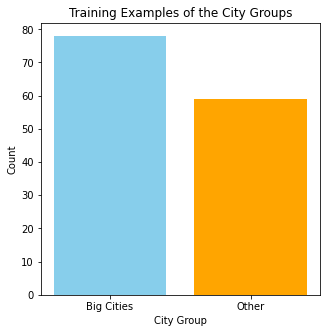

In [9]:
bigCities = len(df[df['City Group'] == "Big Cities"])
otherCount = len(df[df['City Group'] == "Other"])
dic_1 = {"Big Cities": bigCities, "Other": otherCount}

fig, ax = plt.subplots(figsize=(5, 5))
ax.bar(dic_1.keys(), 
       dic_1.values(), 
       width=0.8, 
       color=['skyblue', 'orange'])
ax.set(xlabel= "City Group", 
       ylabel='Count',
       title='Training Examples of the City Groups');
df['City Group'].value_counts()

In [10]:
df['Type'].value_counts()

FC    76
IL    60
DT     1
Name: Type, dtype: int64

In [11]:
df['Open Date'].dtype

dtype('O')

In [12]:
df['Open Date'] = pd.to_datetime(df['Open Date'])

In [13]:
df['Open Date'].dtype

dtype('<M8[ns]')

In [14]:
df.sort_values(by=['Open Date'], inplace=True, ascending=True, ignore_index=True)
df = df.drop('Id', axis=1)

df.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,1996-05-08,Adana,Other,IL,4,5.0,4.0,3.0,1,2,...,2.0,4,1,3,3,3,4,3,3,3903884
1,1997-04-10,İstanbul,Big Cities,IL,12,7.5,6.0,7.5,2,8,...,2.5,25,15,25,6,18,3,16,6,4286645
2,1998-01-28,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,3,...,2.0,3,5,5,2,3,5,4,4,4705945
3,1998-03-14,İstanbul,Big Cities,IL,4,5.0,5.0,4.0,1,5,...,3.0,3,2,1,2,2,1,3,3,3784230
4,1998-07-13,İstanbul,Big Cities,IL,12,7.5,6.0,6.0,2,8,...,7.5,20,15,25,4,24,15,20,6,2551252


In [15]:
df['Sale Day'] = df['Open Date'].dt.day
df['Sale Year'] = df['Open Date'].dt.year
df['Sale Month'] = df['Open Date'].dt.month

In [16]:
df.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P32,P33,P34,P35,P36,P37,revenue,Sale Day,Sale Year,Sale Month
0,1996-05-08,Adana,Other,IL,4,5.0,4.0,3.0,1,2,...,3,3,3,4,3,3,3903884,8,1996,5
1,1997-04-10,İstanbul,Big Cities,IL,12,7.5,6.0,7.5,2,8,...,25,6,18,3,16,6,4286645,10,1997,4
2,1998-01-28,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,3,...,5,2,3,5,4,4,4705945,28,1998,1
3,1998-03-14,İstanbul,Big Cities,IL,4,5.0,5.0,4.0,1,5,...,1,2,2,1,3,3,3784230,14,1998,3
4,1998-07-13,İstanbul,Big Cities,IL,12,7.5,6.0,6.0,2,8,...,25,4,24,15,20,6,2551252,13,1998,7


In [17]:
df['Sale Year'].value_counts()

2011    25
2012    18
2009    16
2010    15
2008    14
2013    12
2006     7
2007     7
1998     4
1999     4
2005     4
2004     3
2014     2
2002     2
2000     2
1997     1
1996     1
Name: Sale Year, dtype: int64

In [18]:
ctg_vars = []

for col in df:
    if len(df[col].unique()) <= 32:
        ctg_vars.append(col)

In [19]:
i = 1
for k in range(1, 43):
    for p in ctg_vars:
        if p == "P" + str(i):
            ctg_vars.remove("P" + str(i))
            i += 1

In [20]:
print(ctg_vars)

['City Group', 'Type', 'Sale Day', 'Sale Year', 'Sale Month']


In [21]:
len(ctg_vars)

5

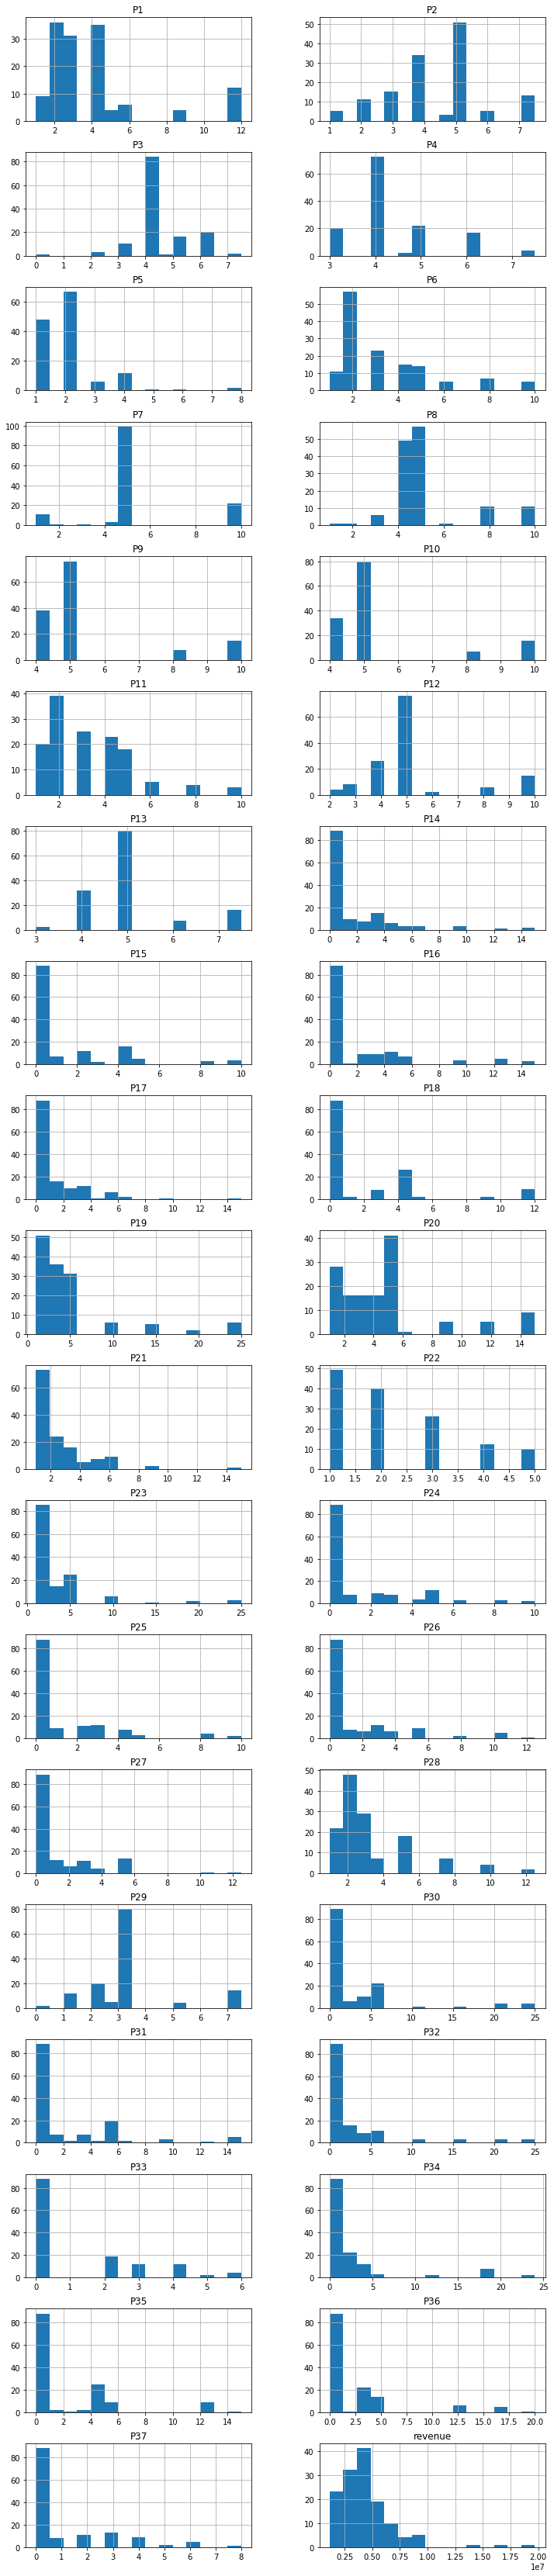

In [22]:
hist_cols = list(df.columns[4:42])
df[hist_cols].hist(figsize= (12,60), layout=(19,2), bins=15);

c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


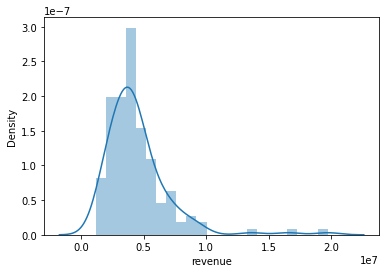

In [23]:
sns.distplot(df['revenue']);

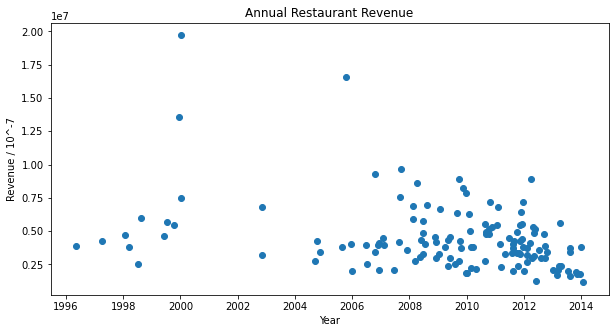

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df['Open Date'], df['revenue'])
ax.set(ylabel="Revenue / 10^-7",
       xlabel='Year',
       title='Annual Restaurant Revenue');

Median Revenue of Big cities: 4234908.0
Median Revenue of Other cities: 3745135.0


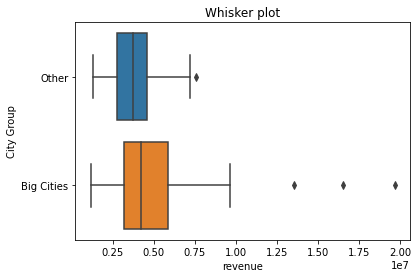

In [25]:
ax_wp_1 = sns.boxplot(x='revenue', y='City Group', data=df)
ax_wp_1.set(title='Whisker plot');

bc_median = df[df['City Group'] == 'Big Cities']['revenue'].median()
oc_median = df[df['City Group'] == 'Other']['revenue'].median()
print("Median Revenue of Big cities:", bc_median)
print("Median Revenue of Other cities:", oc_median)

In [26]:

df['revenue'].max()

19696939

In [27]:
rt_median = df.groupby('Type')['revenue'].aggregate(np.median)
print("Median Revenue of the types of restaurants per annum: \n", rt_median[1:])

Median Revenue of the types of restaurants per annum: 
 Type
FC    3873650.0
IL    4076087.0
Name: revenue, dtype: float64


Text(0.5, 1.0, 'Cumulative Revenue Graph')

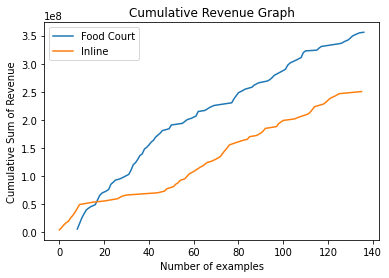

In [28]:
df[df['Type'] == 'FC']['revenue'].cumsum().plot()
df[df['Type'] == 'IL']['revenue'].cumsum().plot()
plt.ylabel('Cumulative Sum of Revenue')
plt.xlabel('Number of examples')
plt.legend(['Food Court', 'Inline'])
plt.title('Cumulative Revenue Graph')

In [29]:
df[df['revenue'] == df['revenue'].max()]['Type']

10    FC
Name: Type, dtype: object

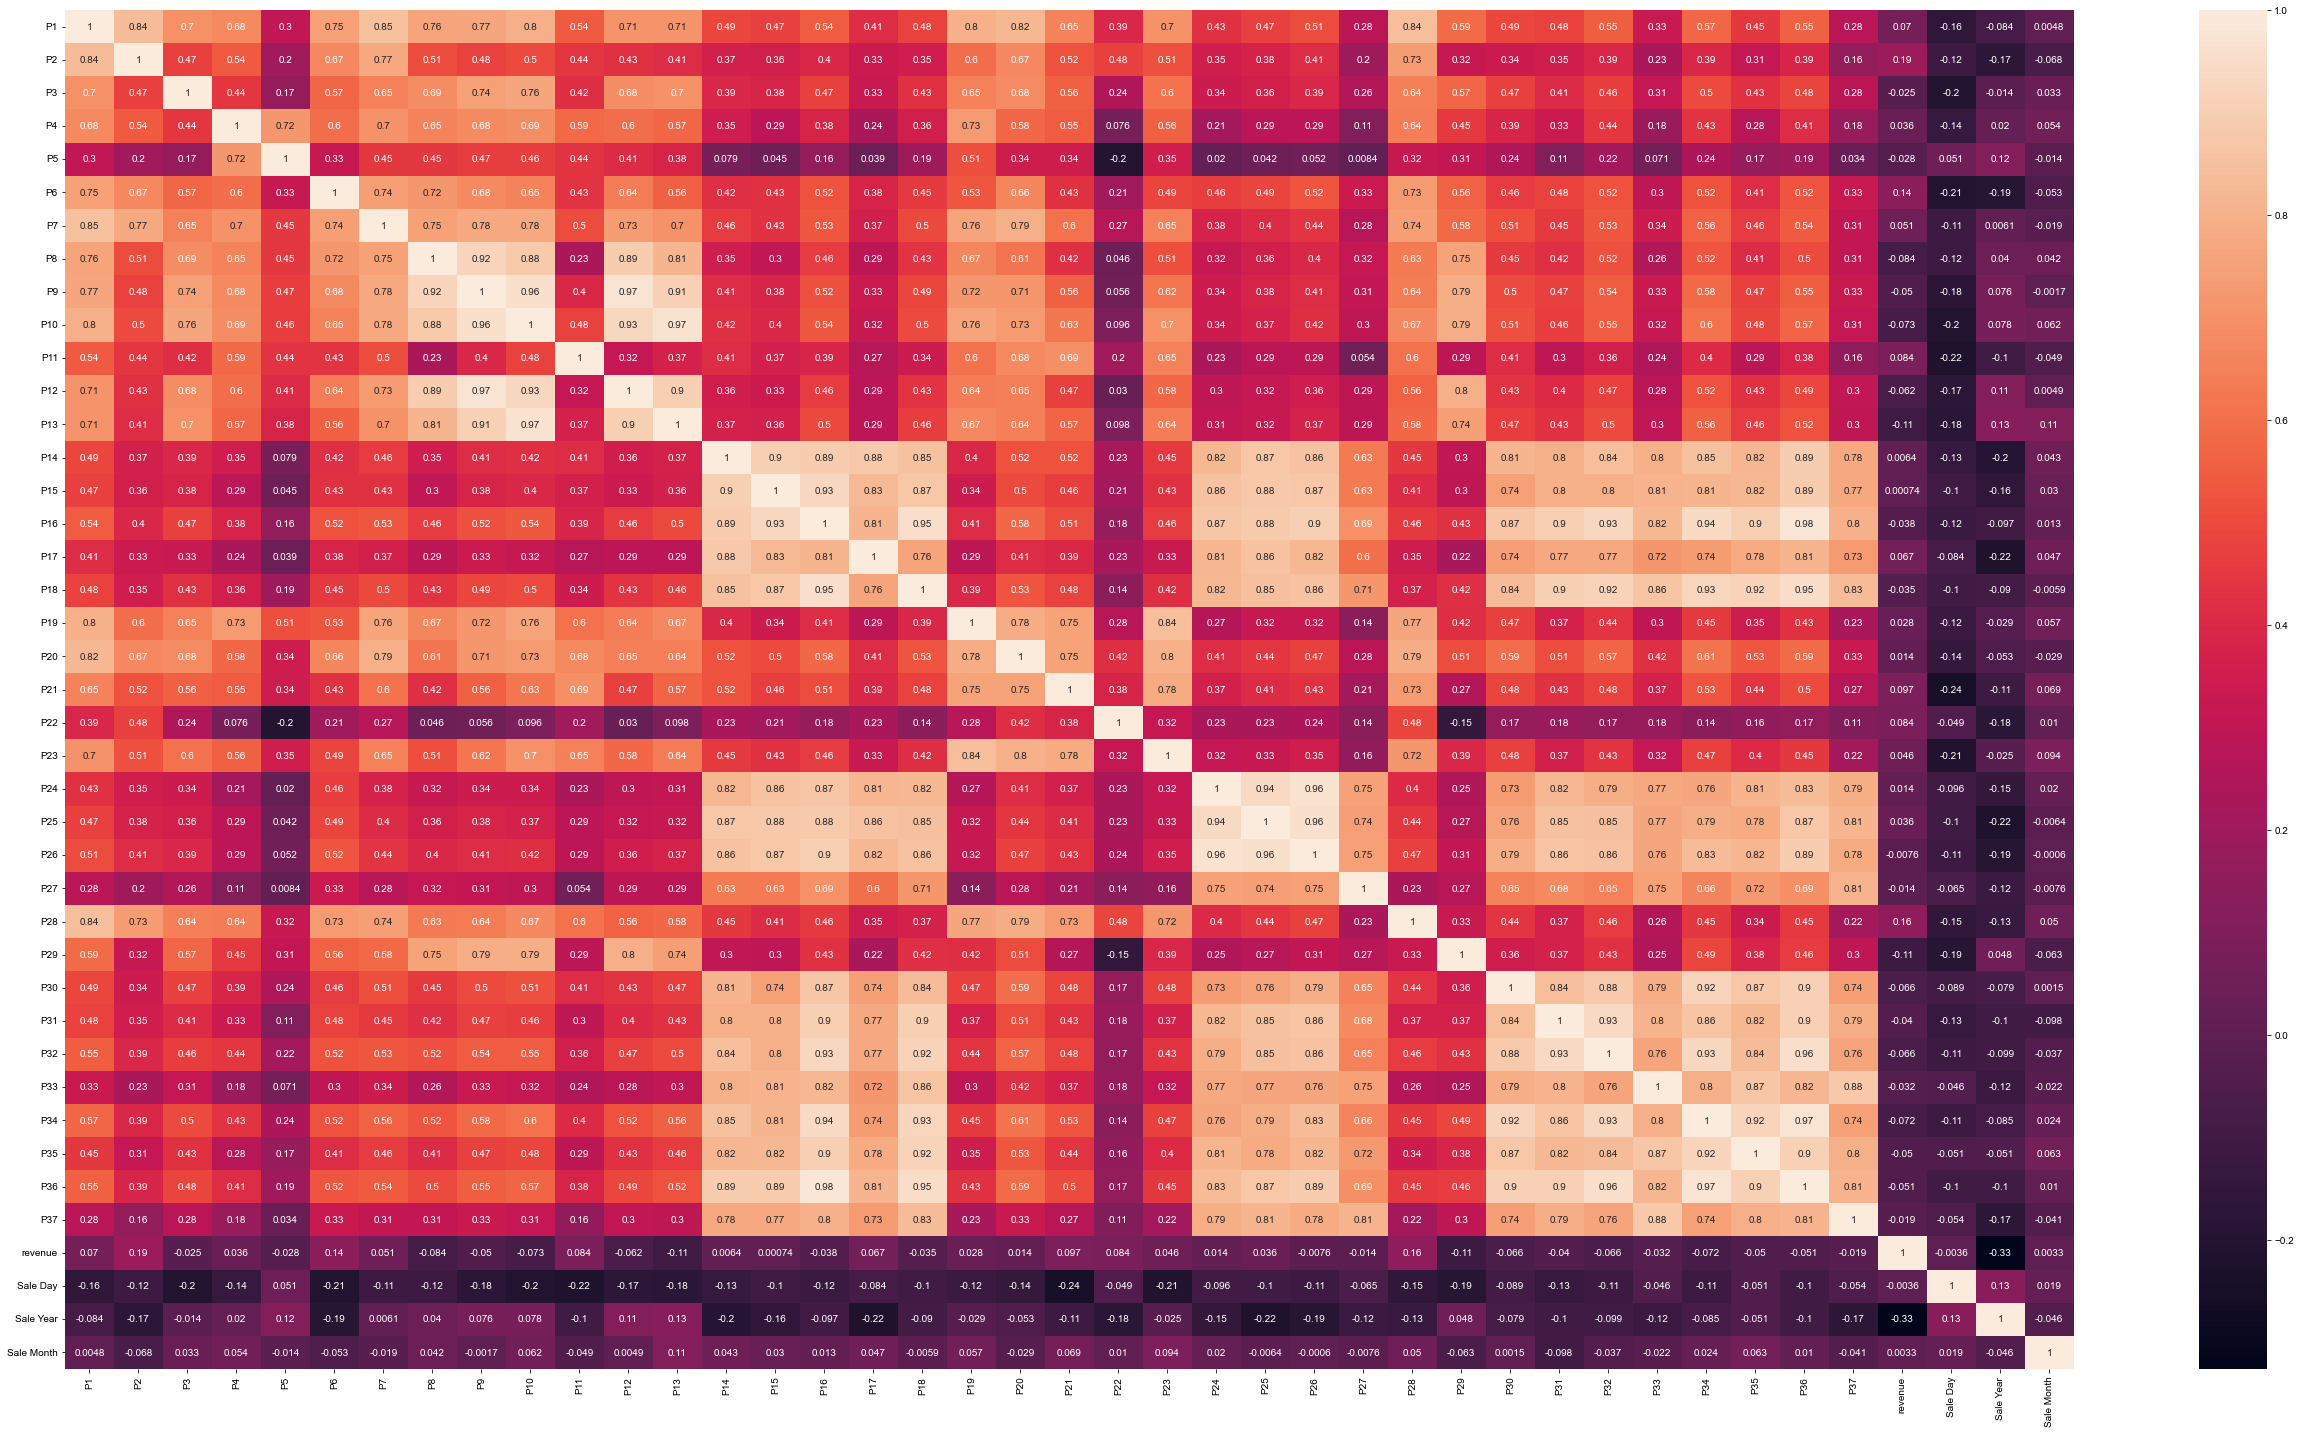

In [30]:
plt.figure(figsize=(45,25))
sns.heatmap(df.corr(),annot=True)
sns.set(font_scale=1.4)

In [31]:
imp_train = IterativeImputer(max_iter=30, random_state=0, missing_values=0, sample_posterior = True, min_value=1)
p_vals = ["P" + str(i) for i in range(1, 38)]
df[p_vals] = np.round(imp_train.fit_transform(df[p_vals]))

In [32]:
data_temp = df.copy()

In [33]:
data_temp.drop('Open Date', axis=1, inplace=True)
data_temp.drop('City', axis=1, inplace=True)

In [34]:
data_temp['revenue'] = np.log1p(data_temp['revenue'])

In [35]:
data_temp.to_csv('train_data_modified.csv', index=False)

In [36]:
data = pd.read_csv('train_data_modified.csv')

In [37]:
data = pd.get_dummies(data, columns=ctg_vars)

In [80]:
data['Sale Year_1995'] = pd.DataFrame(np.zeros((137, 1)), dtype='uint8')
data['Sale Year_2001'] = pd.DataFrame(np.zeros((137, 1)), dtype='uint8')
data['Sale Year_2003'] = pd.DataFrame(np.zeros((137, 1)), dtype='uint8')
data['Sale Day_19'] = pd.DataFrame(np.zeros((137, 1)), dtype='uint8')

In [38]:
print(data.head())

     P1   P2   P3   P4   P5   P6    P7    P8    P9   P10  ...  Sale Month_3  \
0   4.0  5.0  4.0  3.0  1.0  2.0   5.0   4.0   4.0   5.0  ...             0   
1  12.0  8.0  6.0  8.0  2.0  8.0  10.0   8.0   8.0   8.0  ...             0   
2   4.0  5.0  4.0  4.0  1.0  3.0   5.0   5.0   4.0   4.0  ...             0   
3   4.0  5.0  5.0  4.0  1.0  5.0   5.0   5.0   4.0   4.0  ...             1   
4  12.0  8.0  6.0  6.0  2.0  8.0  10.0  10.0  10.0  10.0  ...             0   

   Sale Month_4  Sale Month_5  Sale Month_6  Sale Month_7  Sale Month_8  \
0             0             1             0             0             0   
1             1             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             1             0   

   Sale Month_9  Sale Month_10  Sale Month_11  Sale Month_12  
0          

In [81]:
X = data.drop('revenue', axis=1)
y = data['revenue']

In [82]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=0)

In [83]:
model = RandomForestRegressor(n_estimators=1000 ,random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [84]:
def rmse(y_test, y_preds):
    return np.sqrt(mean_squared_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Validating MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSE": rmse(y_train, train_preds),
              "Validating RMSE": rmse(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Validating R^2": model.score(X_valid, y_valid)}
    return scores

In [85]:
show_scores(model)

{'Training MAE': 0.12489855974713038,
 'Validating MAE': 0.3172497701826527,
 'Training RMSE': 0.16497358279454652,
 'Validating RMSE': 0.3453663263458902,
 'Training R^2': 0.8859164183416651,
 'Validating R^2': 0.15095526573718443}

In [86]:
from catboost import CatBoostRegressor
model_2 = CatBoostRegressor(verbose=False)
model_2.fit(X_train, y_train)

In [87]:

cat_pred = model_2.predict(X_valid)

In [88]:

show_scores(model_2)

{'Training MAE': 0.010162245202120536,
 'Validating MAE': 0.2871700944862849,
 'Training RMSE': 0.012495995358428979,
 'Validating RMSE': 0.33430762946675463,
 'Training R^2': 0.9993454602212134,
 'Validating R^2': 0.20445790099186834}

In [89]:
trees = np.arange(100, 1000, 100)

for i in trees:
    print("Number of Trees: {}".format(i))
    rf_test_model = RandomForestRegressor(n_estimators=i, random_state=0, criterion='mae')
    rf_test_model.fit(X_train, y_train)
    train_preds = rf_test_model.predict(X_train)
    val_preds = rf_test_model.predict(X_valid)
    print('RMSE for training set: {}'.format(rmse(y_train, train_preds)))
    print('RMSE for validation set: {} \n'.format(rmse(y_valid, val_preds)))

Number of Trees: 100


c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


RMSE for training set: 0.17370443701046523
RMSE for validation set: 0.36464269466983434 

Number of Trees: 200


c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


RMSE for training set: 0.16757516877095896
RMSE for validation set: 0.3652133564026569 

Number of Trees: 300


c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


RMSE for training set: 0.1681775627726318
RMSE for validation set: 0.3701268557609026 

Number of Trees: 400


c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


RMSE for training set: 0.16875156442336936
RMSE for validation set: 0.36672556998765987 

Number of Trees: 500


c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


RMSE for training set: 0.1692058314111337
RMSE for validation set: 0.37080360128103346 

Number of Trees: 600


c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


RMSE for training set: 0.1690820441213433
RMSE for validation set: 0.36890562845611735 

Number of Trees: 700


c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


RMSE for training set: 0.16935196800230926
RMSE for validation set: 0.3707307299441914 

Number of Trees: 800


c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


RMSE for training set: 0.1690006704066172
RMSE for validation set: 0.37033293949109913 

Number of Trees: 900


c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


RMSE for training set: 0.16866096322412485
RMSE for validation set: 0.3722761461419937 



In [90]:
rf_grid = {'n_estimators': [200, 600, 800],
           'criterion': ['mse', 'mae'],
           'max_features': [0.33, 0.5, 'auto', 'sqrt'],       
           }

In [91]:
rf_gs = GridSearchCV(estimator = RandomForestRegressor(),
                     param_grid = rf_grid,
                     cv = 5,
                     verbose = True)

rf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': [0.33, 0.5, 'auto', 'sqrt'],
                         'n_estimators': [200, 600, 800]},
             verbose=True)

In [92]:

rf_gs.score(X_valid, y_valid)

0.18214707194139346

In [93]:
rf_gs.score(X_train, y_train)

0.8828632003092215

In [94]:
rf_gs.best_params_

{'criterion': 'mse', 'max_features': 0.33, 'n_estimators': 600}

In [95]:

rf_gs.best_params_['n_estimators']

600

In [96]:
rf_test_model = RandomForestRegressor(n_estimators=rf_gs.best_params_['n_estimators'], random_state=0, 
                                      criterion=rf_gs.best_params_['criterion'], max_features = rf_gs.best_params_['max_features'])
rf_test_model.fit(X_train, y_train)
train_preds = rf_test_model.predict(X_train)
val_preds = rf_test_model.predict(X_valid)
print('RMSE for training set: {}'.format(rmse(y_train, train_preds)))
print('RMSE for validation set: {}'.format(rmse(y_valid, val_preds)))

c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RMSE for training set: 0.1659230962360934
RMSE for validation set: 0.3412683494628066


In [97]:

data_test = pd.read_csv("test.csv")

In [98]:
data_test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05-06-2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [99]:
data_test.isna().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
dtype: int64

In [100]:
len(data_test.City.unique())

57

In [101]:
data_test['Type'].unique()

array(['FC', 'IL', 'DT'], dtype=object)

In [102]:
data_test['Open Date'] = pd.to_datetime(data_test['Open Date'])
data_test.sort_values(by=['Open Date'], inplace=True, ascending=True, ignore_index=True)

In [103]:
data_test['Open Date'].dtype

dtype('<M8[ns]')

In [104]:
data_test['Sale Day'] = data_test['Open Date'].dt.day
data_test['Sale Year'] = data_test['Open Date'].dt.year
data_test['Sale Month'] = data_test['Open Date'].dt.month

In [105]:
data_test.drop('Open Date', axis=1, inplace=True)
data_test.drop('City', axis=1, inplace=True)

In [106]:
ctg_vars_test = []

for col in data_test:
    if len(data_test[col].unique()) <= 31:
        ctg_vars_test.append(col)

In [107]:
i = 1
for k in range(1, 43):
    for p in ctg_vars_test:
        if p == "P" + str(i):
            ctg_vars_test.remove("P" + str(i))
            i += 1

In [108]:
print(ctg_vars_test)

['City Group', 'Type', 'Sale Day', 'Sale Year', 'Sale Month']


In [109]:
data_temp_test = data_test.copy()

In [110]:
data_temp_test.loc[data_temp_test['Type'] == 'MB', 'Type'] = 'DT'

In [111]:
imp_test = IterativeImputer(max_iter=30, random_state=0, missing_values=0, sample_posterior = True, min_value=1)
p_vals_test = ["P" + str(i) for i in range(1, 38)]
data_temp_test[p_vals_test] = np.round(imp_test.fit_transform(data_temp_test[p_vals_test]))

In [ ]:
data_temp_test = pd.get_dummies(data_temp_test, columns=ctg_vars_test)

In [ ]:
data_temp_test.to_csv('test_data_modified.csv', index=False)

In [ ]:
test_data = pd.read_csv('test_data_modified.csv')

In [ ]:
submission = pd.DataFrame(columns=["Id", "Prediction"])
submission["Id"] = test_data['Id']

# Random Forest Model predictions
rf_pred_sub = rf_test_model.predict(test_data.drop('Id', axis=1))
submission['Prediction'] = np.expm1(rf_pred_sub)
submission.to_csv('submission_random_forest.csv', index=False)

# CatBoost Model predictions
cb_pred_sub = model_2.predict(test_data.drop('Id', axis=1))
submission['Prediction'] = np.expm1(cb_pred_sub)
submission.to_csv('submission_cat_boost.csv', index=False)